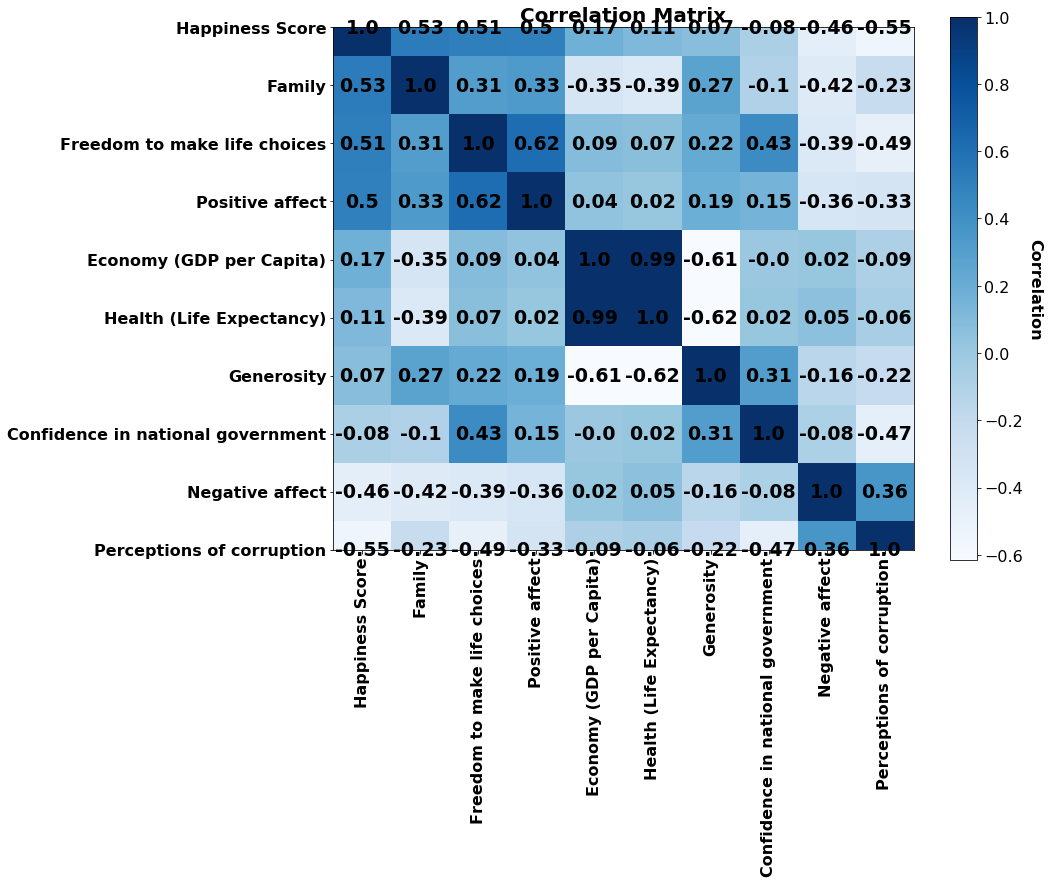

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import iplot
import os
import csv

import plotly.express as px
import folium

df = pd.read_csv("../Datasets/happiness_merged.csv")
# define the columns of interest
feature_cols = ["Happiness Score", 'Family',
                "Freedom to make life choices","Positive affect",  "Economy (GDP per Capita)", 'Health (Life Expectancy)', 'Generosity',"Confidence in national government", "Negative affect"
                , "Perceptions of corruption"]

# select the columns and create a new dataframe
df_corr = df[feature_cols].corr()

# create a figure and axis object
fig, ax = plt.subplots(figsize=(13, 10))

# create the heatmap using imshow function
im = ax.imshow(df_corr.values, cmap='Blues')

# add title and axis labels
ax.set_xticks(np.arange(len(feature_cols)))
ax.set_yticks(np.arange(len(feature_cols)))
ax.set_xticklabels(feature_cols, rotation=90,  fontsize=16,weight="bold")
ax.set_yticklabels(feature_cols, fontsize=16,weight="bold")
ax.set_title("Correlation Matrix", fontsize=20,weight="bold")

# add the correlation values as text
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        text = ax.text(j, i, round(df_corr.iloc[i, j], 2), ha="center", va="center", fontsize=19,weight="bold")

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16  )
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=16,weight="bold")

# show the plot
plt.show()

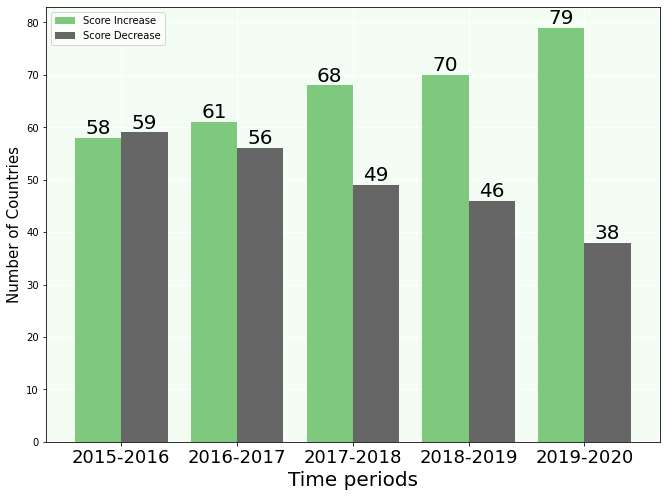

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Datasets/COVID_Analysis_Dataset.csv")

# create a list of the column names to include in the graph
columns_to_include = ['2015-2016', '2016-2017', '2017-2018', '2018-2019','2019-2020',]

# create a new DataFrame with just the selected columns
df_selected = df[columns_to_include]

# create a new DataFrame to hold the counts of positive and negative values
counts_df = pd.DataFrame(columns=['Score Increase', 'Score Decrease'])

# iterate over the selected columns and count the number of positive and negative values
for col in columns_to_include:
    pos_count = (df_selected[col] > 0).sum()
    neg_count = (df_selected[col] < 0).sum()
    counts_df.loc[col] = [pos_count, neg_count]

# create the bar grap
ax = counts_df.plot(kind='bar', width=0.8, figsize=(11, 8), zorder=2, colormap='Accent')

# set the title and axis labels
ax.set_title('', fontsize=25)
ax.set_xlabel('Time periods', fontsize=20)
ax.set_ylabel('Number of Countries', fontsize=15)
#ax.set_facecolor('#f1f1f1')

# set the x-axis tick labels to the column names
ax.set_xticklabels(columns_to_include, rotation=0, fontsize=18)

# add labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=20)

# Set the background color of the plot
ax.set_facecolor('#f4fdf4')

# Add a grid to the plot
ax.grid(color='white', linestyle='-', linewidth=1, zorder = 1)    
    
# display the graph
plt.show()


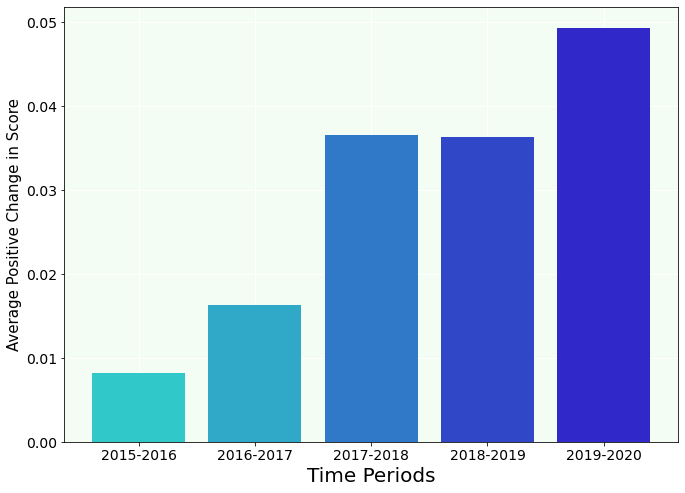

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("../Datasets/COVID_Analysis_Dataset.csv")

# Select the first two columns
cols_of_interest = ['2015-2016', '2016-2017', '2017-2018', '2018-2019','2019-2020']
subset = df[cols_of_interest]

# Calculate the average of each column
avg = subset.mean()

# Create a new figure with a white grid and green background
fig, ax = plt.subplots(figsize=(11, 8))
ax.set_axisbelow(True)
ax.grid(color='white', linestyle='-', linewidth=1)
ax.set_facecolor('#f4fdf4')

# Create a bar plot of the averages with custom colors
colors = ['#30c8c8', '#30a8c8', '#3078c8', '#3048c8', '#3028c8']
plt.bar(avg.index, avg.values, color=colors)

# Set the title and axis labels
plt.title('', fontsize=20)
plt.xlabel('Time Periods', fontsize=20)
plt.ylabel('Average Positive Change in Score', fontsize=15)

# Increase the font size of the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

In [11]:
import plotly.express as px
df = pd.read_csv("../Datasets/happiness_merged.csv")
df.head()
data_2015=df.loc[df['year'] == 2015]
data_2016=df.loc[df['year'] == 2016]
data_2017=df.loc[df['year'] == 2017]
data_2018=df.loc[df['year'] == 2018]
data_2019=df.loc[df['year'] == 2019]
data_2020=df.loc[df['year'] == 2020]
data_2021=df.loc[df['year'] == 2021]
data_2022=df.loc[df['year'] == 2022]

In [21]:
happy =data_2021
# information to be given when mouse over the country
hover_data = happy[["Happiness Rank","Life Ladder","Freedom to make life choices","Perceptions of corruption","Confidence in national government",
       "Economy (GDP per Capita)","Family",
       "Health (Life Expectancy)","Generosity","Positive affect", "Negative affect"]]
fig = px.choropleth(happy,
                    locations=happy["Country"],
                    locationmode="country names",
                    projection="natural earth",
                    hover_data=hover_data,
                    hover_name=happy["Country"],
                    color="Happiness Score",
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    title='Hapiness Scores in 2021 ',
                    scope="world")
# show the figure
fig.show()
# fig.update_layout(geo_scope='world',
# #                               colorscale=True,
#                               title_text='Hapiness Scores in 2021 '
#                                )

In [20]:
happy =data_2015
# information to be given when mouse over the country

hover_data = happy[["Happiness Rank","Life Ladder","Freedom to make life choices","Perceptions of corruption","Confidence in national government",
       "Economy (GDP per Capita)","Family",
       "Health (Life Expectancy)","Generosity","Positive affect", "Negative affect"]]
fig = px.choropleth(happy,
                    locations=happy["Country"],
                    locationmode="country names",
                    projection="natural earth",
                    hover_data=hover_data,
                    hover_name=happy["Country"],
                    color="Happiness Score",
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    title='Hapiness Scores in 2015 ',
                    scope="world")
fig.show()
# fig.update_layout(geo_scope='world',
# #                               colorscale=True,
#                               title_text='Hapiness Scores in 2015 '
#                                )

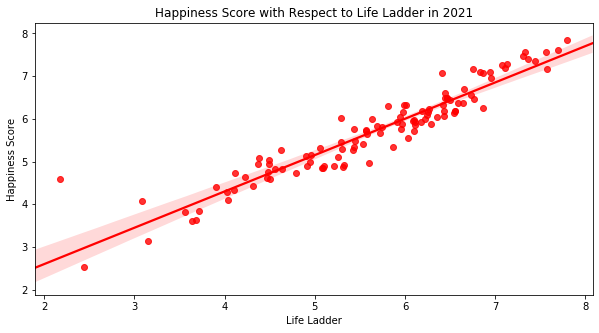

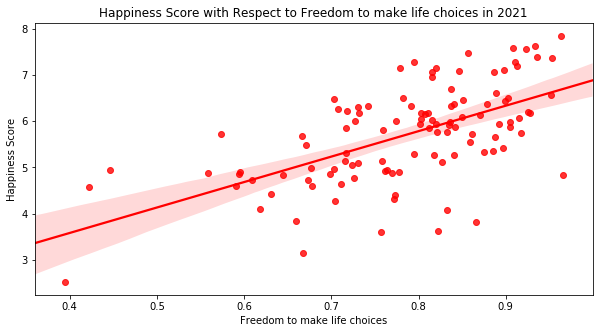

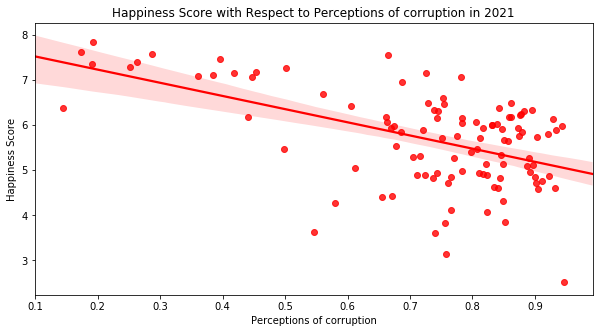

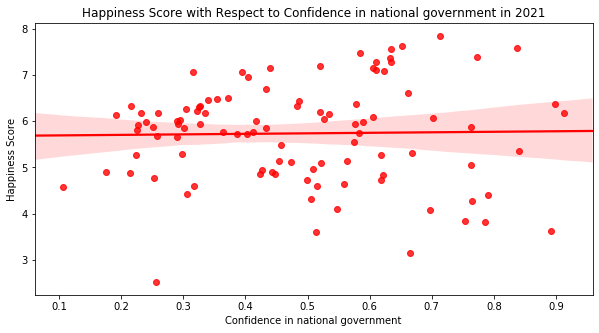

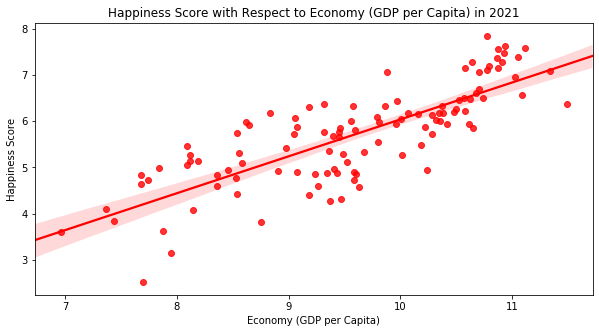

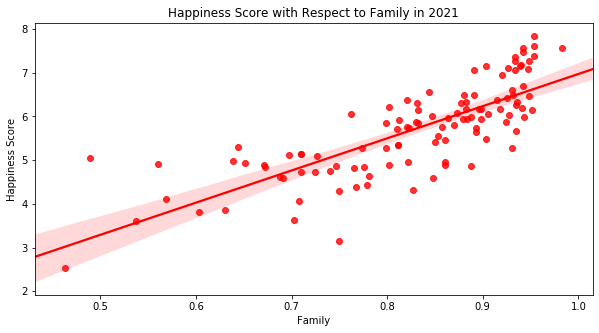

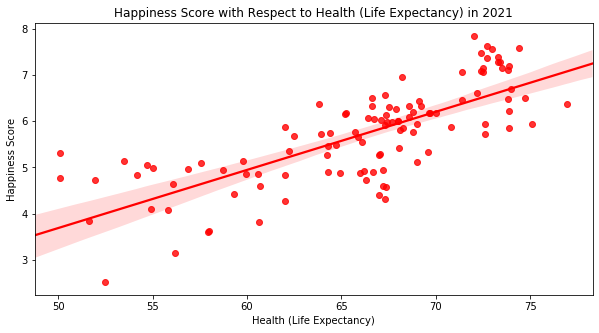

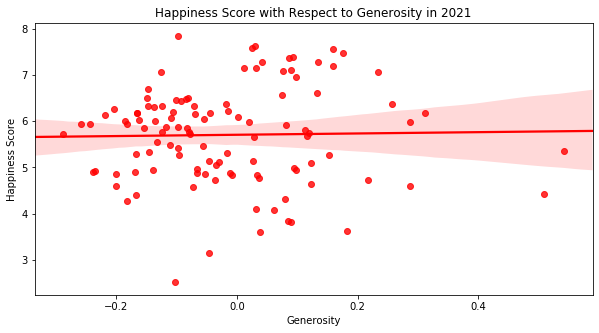

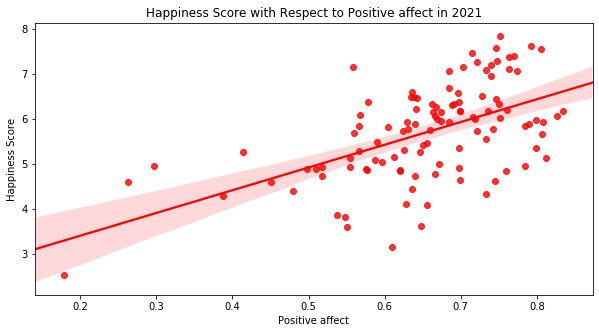

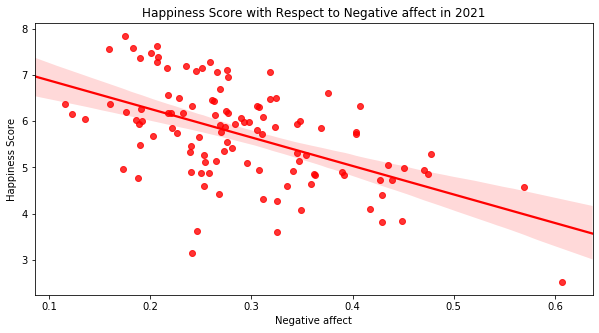

In [14]:
#identify the features related
cols=["Life Ladder","Freedom to make life choices","Perceptions of corruption","Confidence in national government",
       "Economy (GDP per Capita)","Family",
       "Health (Life Expectancy)","Generosity","Positive affect", "Negative affect"]
#plot the variate figures
for a in cols:
    plt.figure(figsize=(10,5))
    plt.title('Happiness Score with Respect to {} in 2021'.format(a))
    sns.regplot(x=a,y='Happiness Score',data=data_2021,color='r')
    plt.savefig('plots_{}_Bivarate.png'.format(a))